In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# **Data Collection**

In [ ]:
data=pd.read_csv(r"/content/apple_quality.csv")

# **Data Exploration**

In [ ]:
datac=data.copy()

In [ ]:
datac

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
datac.shape    # 4001 dp , 9 variable

(4001, 9)

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
datac.duplicated().sum()    # null values

0

In [ ]:
datac.drop(4000,axis=0,inplace=True)

In [ ]:
datac["Quality"].value_counts() # balanced dataset

good    2004
bad     1996
Name: Quality, dtype: int64

In [ ]:
fv=datac.iloc[:,1:-1]
cv=datac.iloc[:,-1]

In [ ]:
fv.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [ ]:
cv.head()

0    good
1    good
2     bad
3    good
4    good
Name: Quality, dtype: object

In [ ]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# spliting the Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cv

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

In [ ]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
data.dropna()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


## **Spliting data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( fv,cv,test_size=0.4, random_state=0)

In [ ]:
X_train

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1898,-1.064191,0.055565,-0.860757,1.717759,-3.339802,0.907997,1.943418859
390,-0.153111,-2.489734,-2.194768,-0.590089,3.560605,1.828833,0.205756573
2473,-2.783937,0.327640,-1.307993,1.342266,-0.581627,-2.282752,-0.017094245
1058,-2.085930,1.273998,-0.910669,1.510735,4.988858,-2.112236,-4.085738692
187,-2.743304,-1.214043,-1.989255,-0.650298,-0.495184,3.849169,-1.865832708
...,...,...,...,...,...,...,...
835,-0.245488,-2.933224,1.122287,1.516150,1.763625,1.957460,-1.675279484
3264,1.466278,-3.403242,0.880976,2.713309,-2.802334,0.768233,0.014034095
1653,-0.119943,0.432874,-2.564916,0.533345,-0.882094,1.952705,0.592650517
2607,-3.955932,3.516142,-0.404922,-0.442342,-0.495453,-0.688491,-2.046503511


In [ ]:
X_test

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
2230,-0.882114,-0.630218,-2.350979,1.094072,-2.922815,0.701125,-1.187544333
668,1.465806,-2.775201,0.992624,1.501921,-1.440469,3.638385,0.352908697
3617,0.775450,-1.211851,-3.905037,1.223717,1.621898,3.552186,-1.151269301
2363,-0.984528,-2.011153,0.532582,0.218817,1.686125,0.184332,2.204141635
142,1.259488,-0.557898,-2.578773,-0.488970,2.581219,-0.232605,0.489466669
...,...,...,...,...,...,...,...
2459,1.015501,-0.302487,-0.046177,-1.037177,0.028679,-0.713654,-0.662878148
1958,-2.775879,-0.680914,0.727236,0.281705,2.650428,0.094430,2.860697945
2964,0.962091,-4.516877,-0.156611,1.404099,1.729481,-1.406990,1.059900355
1811,-0.402777,-0.484443,-0.532287,1.413181,2.205942,1.066628,-0.37089119


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 390 to 2732
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         2400 non-null   float64
 1   Weight       2400 non-null   float64
 2   Sweetness    2400 non-null   float64
 3   Crunchiness  2400 non-null   float64
 4   Juiciness    2400 non-null   float64
 5   Ripeness     2400 non-null   float64
 6   Acidity      2400 non-null   object 
dtypes: float64(6), object(1)
memory usage: 150.0+ KB


In [ ]:
import scipy.stats as ss

Size


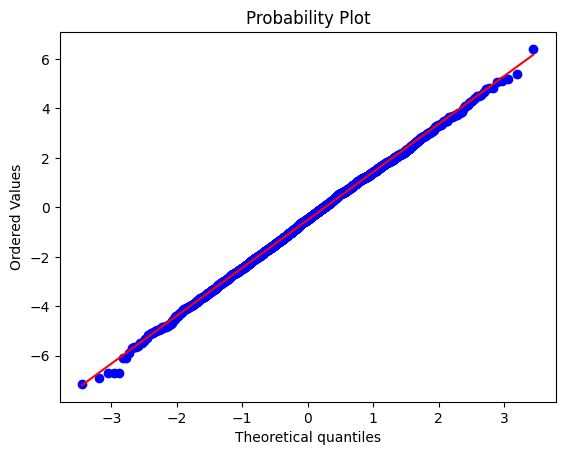

Weight


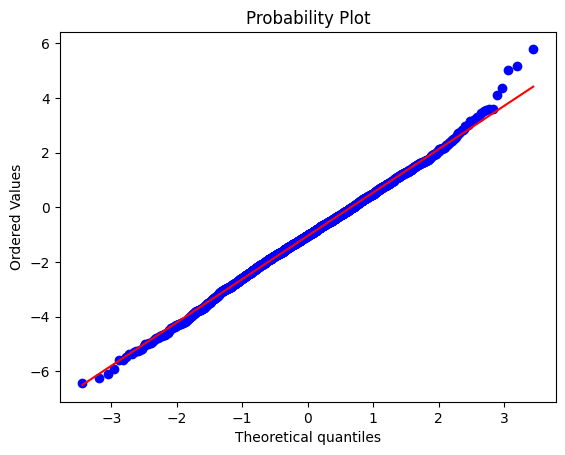

Sweetness


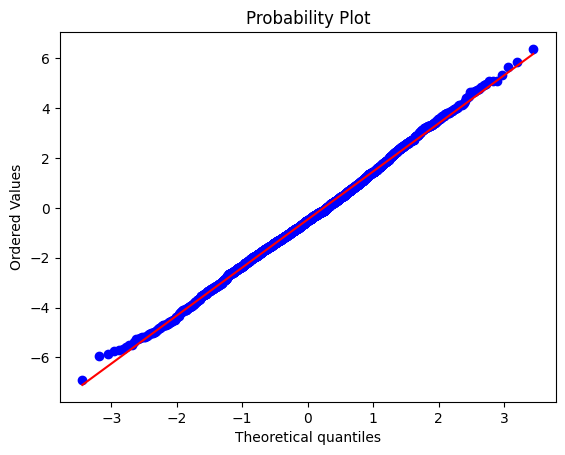

Crunchiness


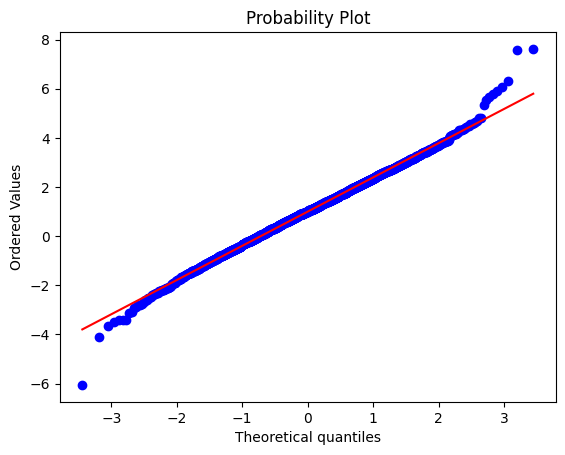

Juiciness


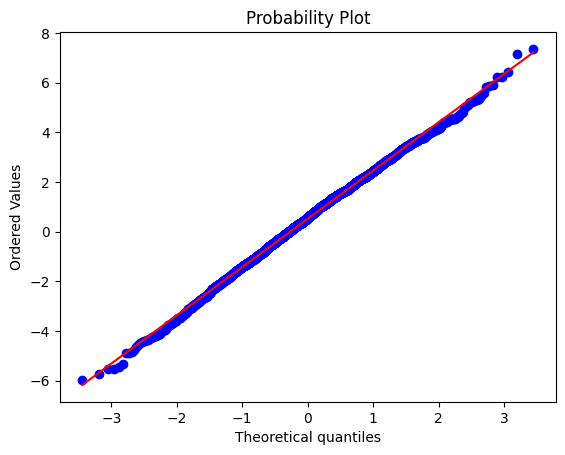

Ripeness


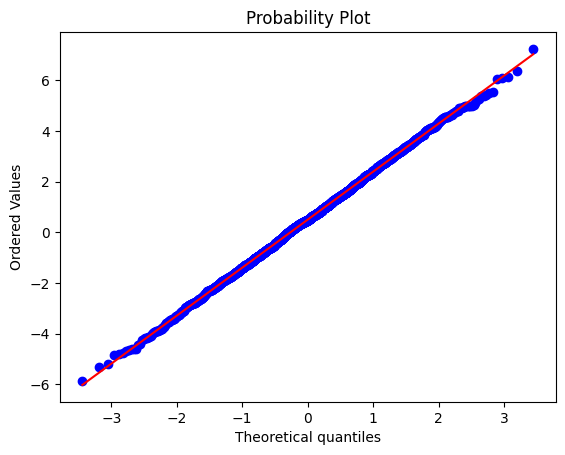

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

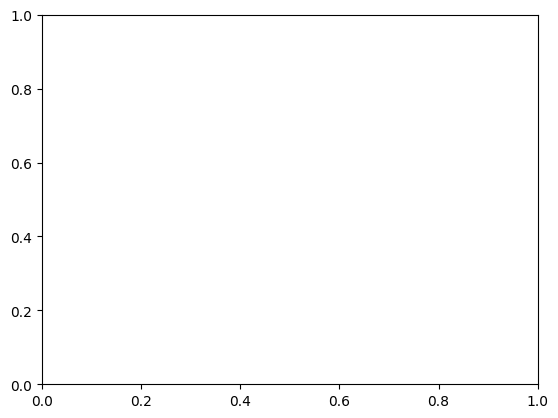

In [ ]:
for y in X_train.columns:
    plt.subplot(111)
    ss.probplot(X_train[y],dist='norm', fit=True, plot=plt)
    print(y)
    plt.show()

<Axes: xlabel='Crunchiness', ylabel='Density'>

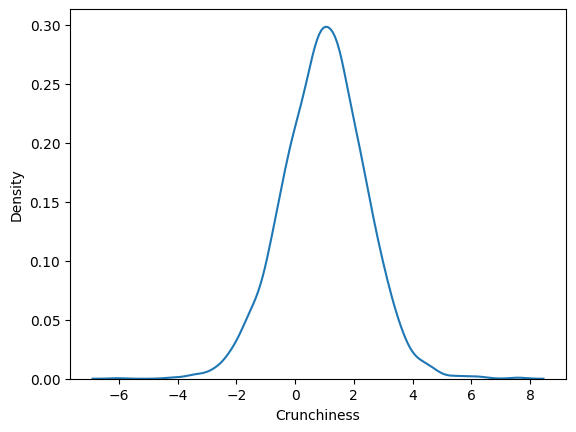

In [ ]:
sns.kdeplot(x_train["Crunchiness"])

In [ ]:
from re import X
numerical_data = X_train.select_dtypes(include=["int64"])
cate_data = X_train.select_dtypes(include=["object"])


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer

In [ ]:
nup=Pipeline([("imput_n",SimpleImputer()),("scaling",StandardScaler())])

In [ ]:
cp=Pipeline([("impu_c", SimpleImputer(strategy="most_frequent")),("Encoding", OneHotEncoder())])

In [ ]:
nup

Pipeline(steps=[('imput_n', SimpleImputer()), ('scaling', StandardScaler())])

In [ ]:
cp

Pipeline(steps=[('impu_c', SimpleImputer(strategy='most_frequent')),
                ('Encoding', OneHotEncoder())])

In [ ]:
cpt = ColumnTransformer([("numerical", nup, numerical_data.columns), ("categorical", cp, cate_data.columns)], remainder="passthrough")


In [ ]:
cpt

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imput_n', SimpleImputer()),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index([], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('impu_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoding',
                                                  OneHotEncoder())]),
                                 Index(['Acidity'], dtype='object'))])

In [ ]:
cpt.fit_transform(X_train)

<2400x2406 sparse matrix of type '<class 'numpy.float64'>'
	with 16800 stored elements in Compressed Sparse Row format>

# **GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb=GaussianNB()

In [ ]:
model=gb.fit(X_train,y_train)

# **Accuracy Score**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predicted_yi=model.predict(X_test)


In [ ]:
accuracy_score(y_test,predicted_yi)

0.7425

In [ ]:
cv.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score,f1_score,classification_report,roc_curve



In [ ]:
cm=confusion_matrix(y_test,model.predict(X_test))
cm

array([[590, 221],
       [191, 598]])

<Axes: >

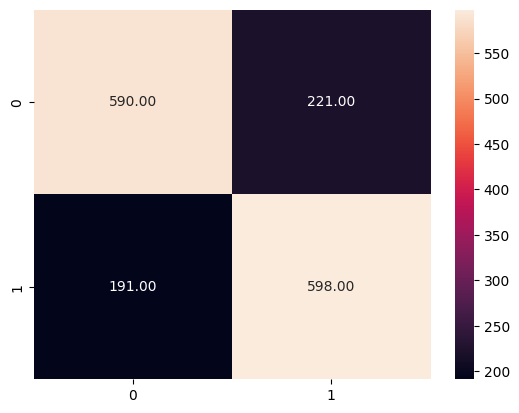

In [ ]:
sns.heatmap(cm , annot =True ,fmt = '.2f')

In [ ]:
gb.classes_

array(['bad', 'good'], dtype='<U4')

# **Precision Score**

In [ ]:
predicted_y = model.predict(X_test)

In [ ]:
precision_score(y_test,predicted_yi,pos_label="good")

0.7301587301587301

In [ ]:
precision_score(y_test,predicted_yi,pos_label="bad")

0.7554417413572343

## **Recall Score**

In [ ]:
recall_score(y_test,predicted_yi,pos_label="good")

0.7579214195183777

In [ ]:
recall_score(y_test,predicted_yi,pos_label="bad")

0.7274969173859432

# **F1 Score**

In [ ]:
f1_score(y_test,predicted_yi,pos_label="good")

0.7437810945273632

In [ ]:
print(classification_report(y_test,predicted_yi))

              precision    recall  f1-score   support

         bad       0.76      0.73      0.74       811
        good       0.73      0.76      0.74       789

    accuracy                           0.74      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.74      0.74      1600



In [ ]:
pr=model.predict_proba(X_test)[:,1]

In [ ]:
pr

array([0.05687091, 0.28557919, 0.61264293, ..., 0.50247991, 0.93333941,
       0.45891382])

# **ROC Curve**

In [ ]:
fpr, tpr, _ = roc_curve(y_test, pr, pos_label='good')  # Assuming 'good' is the positive class


In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, [0 for _ in range(len(y_test))], pos_label='good')  # Assuming 'good' is the positive class


In [ ]:
print(fpr,tpr)

[0.         0.         0.         0.00123305 0.00123305 0.00246609
 0.00246609 0.00369914 0.00369914 0.00493218 0.00493218 0.00616523
 0.00616523 0.00739827 0.00739827 0.01109741 0.01109741 0.01233046
 0.01233046 0.0135635  0.0135635  0.01479655 0.01479655 0.01602959
 0.01602959 0.01726264 0.01726264 0.01849568 0.01849568 0.02096178
 0.02096178 0.02219482 0.02219482 0.02342787 0.02342787 0.02466091
 0.02466091 0.02589396 0.02589396 0.027127   0.027127   0.02836005
 0.02836005 0.02959309 0.02959309 0.03082614 0.03082614 0.03205919
 0.03205919 0.03329223 0.03329223 0.03452528 0.03452528 0.03575832
 0.03575832 0.03699137 0.03699137 0.03822441 0.03822441 0.03945746
 0.03945746 0.04069051 0.04069051 0.04192355 0.04192355 0.04438964
 0.04438964 0.04685573 0.04685573 0.04932182 0.04932182 0.05055487
 0.05055487 0.05178792 0.05178792 0.05302096 0.05302096 0.05425401
 0.05425401 0.05548705 0.05548705 0.0567201  0.0567201  0.05918619
 0.05918619 0.06411837 0.06411837 0.06535142 0.06535142 0.0665